# Final Project

You have made it to the end of the course.
In the labs, you saw a couple simplified examples of constructing data stories.

For the final project, you will 
 1. find some data, 
 2. upload it to JupyterHub
 3. construct a data story

---

## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name of the file that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, and perform some exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
# load packages
library(dplyr)
library(tidyr)
library(ggplot2)
library(RColorBrewer)

# load data
df <- read.csv("master.csv", header = TRUE, stringsAsFactors = FALSE)
head(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


In [72]:
# summary for exploratory data analysis
summary(df)

   country               year          sex                age           
 Length:27820       Min.   :1985   Length:27820       Length:27820      
 Class :character   1st Qu.:1995   Class :character   Class :character  
 Mode  :character   Median :2002   Mode  :character   Mode  :character  
                    Mean   :2001                                        
                    3rd Qu.:2008                                        
                    Max.   :2016                                        
                                                                        
  suicides_no        population       suicides.100k.pop country.year      
 Min.   :    0.0   Min.   :     278   Min.   :  0.00    Length:27820      
 1st Qu.:    3.0   1st Qu.:   97498   1st Qu.:  0.92    Class :character  
 Median :   25.0   Median :  430150   Median :  5.99    Mode  :character  
 Mean   :  242.6   Mean   : 1844794   Mean   : 12.82                      
 3rd Qu.:  131.0   3rd Qu.: 1486143   3rd

In [73]:
# more general information on the dataframe characteristics
str(df)

'data.frame':	27820 obs. of  12 variables:
 $ country           : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ year              : int  1987 1987 1987 1987 1987 1987 1987 1987 1987 1987 ...
 $ sex               : chr  "male" "male" "female" "male" ...
 $ age               : chr  "15-24 years" "35-54 years" "15-24 years" "75+ years" ...
 $ suicides_no       : int  21 16 14 1 9 1 6 4 1 0 ...
 $ population        : int  312900 308000 289700 21800 274300 35600 278800 257200 137500 311000 ...
 $ suicides.100k.pop : num  6.71 5.19 4.83 4.59 3.28 2.81 2.15 1.56 0.73 0 ...
 $ country.year      : chr  "Albania1987" "Albania1987" "Albania1987" "Albania1987" ...
 $ HDI.for.year      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ gdp_for_year....  : chr  "2,156,624,900" "2,156,624,900" "2,156,624,900" "2,156,624,900" ...
 $ gdp_per_capita....: int  796 796 796 796 796 796 796 796 796 796 ...
 $ generation        : chr  "Generation X" "Silent" "Generation X" "G.I. Generation" ...


## Step 5: Filter Results

Perform you data carpentry that helps in your story telling here.

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [2]:
# filter for only US data
us_data <- df %>% filter(country == "United States")

# fix column names
us_data <- us_data %>% rename(
    suicide_total = suicides_no,
    suicide_by_100k = suicides.100k.pop,
    gdp_per_capita = gdp_per_capita....,
    hdi = HDI.for.year,
    gdp = gdp_for_year....
    )

# drop column with repeat data for neatness
us_data <- us_data %>% select(-country.year)

head(us_data)
tail(us_data)

country,year,sex,age,suicide_total,population,suicide_by_100k,hdi,gdp,gdp_per_capita,generation
<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>
United States,1985,male,75+ years,2177,4064000,53.57,0.841,"4,346,734,000,000",19693,G.I. Generation
United States,1985,male,55-74 years,5302,17971000,29.50,0.841,"4,346,734,000,000",19693,G.I. Generation
United States,1985,male,25-34 years,5134,20986000,24.46,0.841,"4,346,734,000,000",19693,Boomers
United States,1985,male,35-54 years,6053,26589000,22.77,0.841,"4,346,734,000,000",19693,Silent
United States,1985,male,15-24 years,4267,19962000,21.38,0.841,"4,346,734,000,000",19693,Generation X
United States,1985,female,35-54 years,2105,27763000,7.58,0.841,"4,346,734,000,000",19693,Silent


,country,year,sex,age,suicide_total,population,suicide_by_100k,hdi,gdp,gdp_per_capita,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>
367,United States,2015,female,55-74 years,2872,35115610,8.18,NA,"18,120,714,000,000",60387,Boomers
368,United States,2015,female,25-34 years,1444,21555712,6.70,NA,"18,120,714,000,000",60387,Millenials
369,United States,2015,female,15-24 years,1132,21633813,5.23,NA,"18,120,714,000,000",60387,Millenials
370,United States,2015,female,75+ years,540,11778666,4.58,NA,"18,120,714,000,000",60387,Silent
371,United States,2015,male,5-14 years,255,21273987,1.20,NA,"18,120,714,000,000",60387,Generation Z
372,United States,2015,female,5-14 years,158,20342901,0.78,NA,"18,120,714,000,000",60387,Generation Z


In [3]:
# order age and generation columns for clear graphics
us_data <- us_data %>%
    mutate(age = factor(age, levels=c("5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"))) %>%
    mutate(generation = factor(generation, levels=c("Generation Z", "Millenials", "Generation X", "Boomers", "Silent", "G.I. Generation")))

## Step 6: Visuals 

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

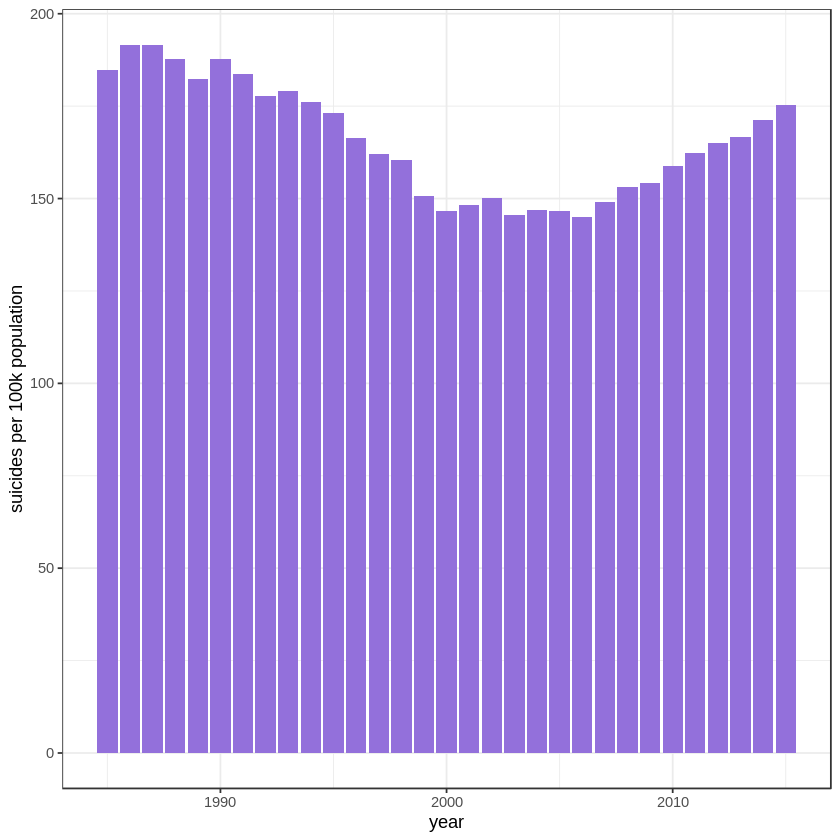

In [76]:
# a simple histogram looking at overall change over time
g1 <- ggplot(us_data, aes(x = year, y = suicide_by_100k)) + geom_bar(stat = "identity", fill = "mediumpurple")
g1 <- g1 + labs(y = "suicides per 100k population") + theme_bw()
g1

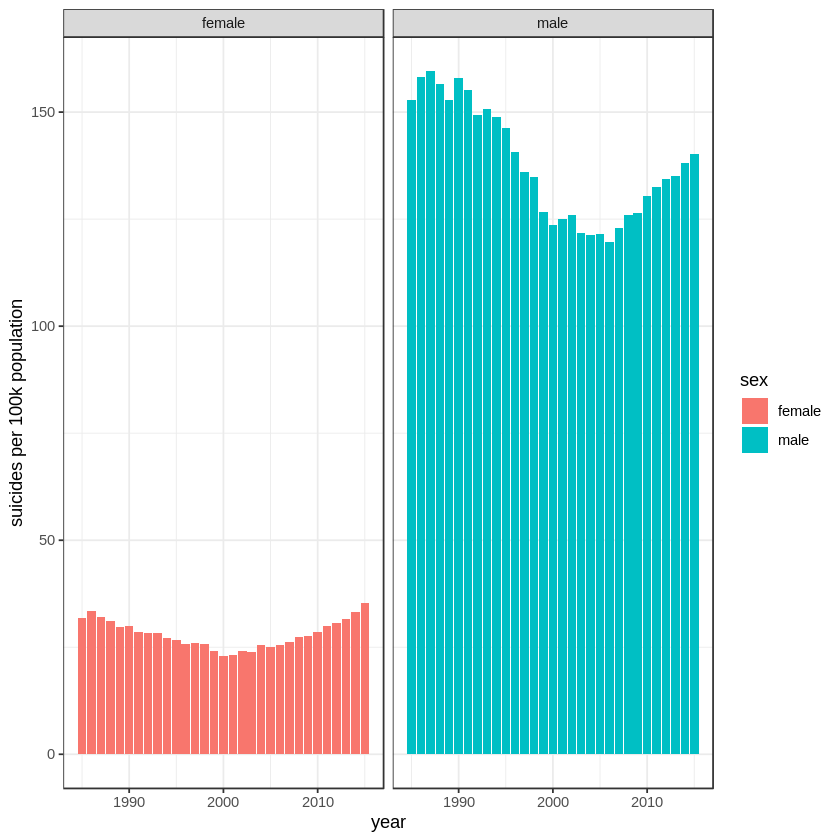

In [77]:
# graph of suicide rates over time comparing gender
g2 <- ggplot(us_data, aes(x = year, y = suicide_by_100k, fill = sex)) + geom_bar(stat = "identity") +
    facet_wrap(~sex)
g2 <- g2 + labs(y = "suicides per 100k population") + theme_bw()
g2

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


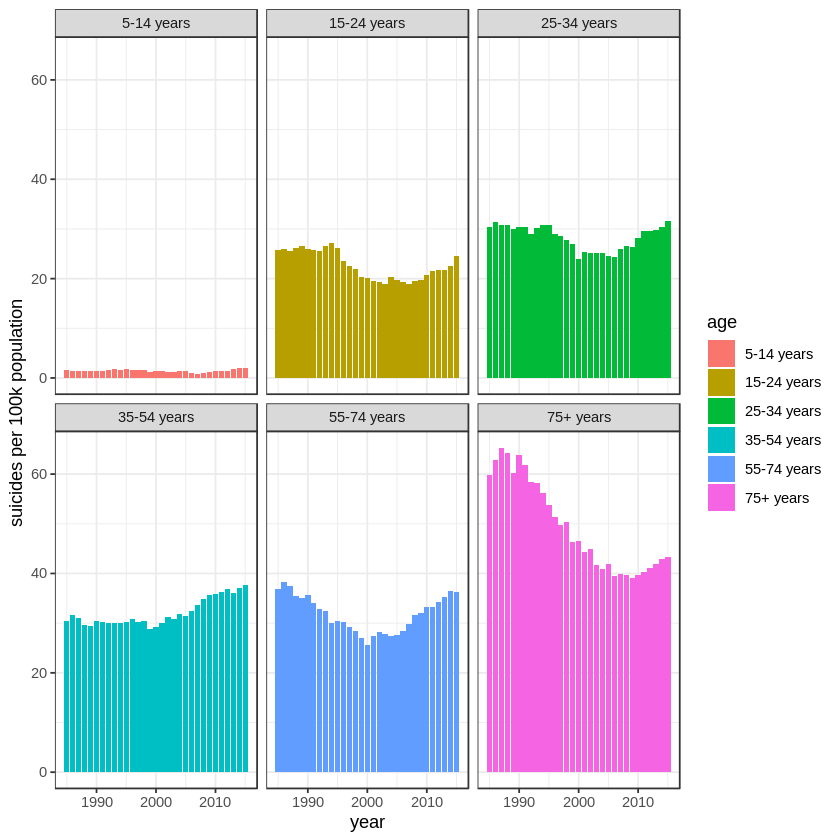

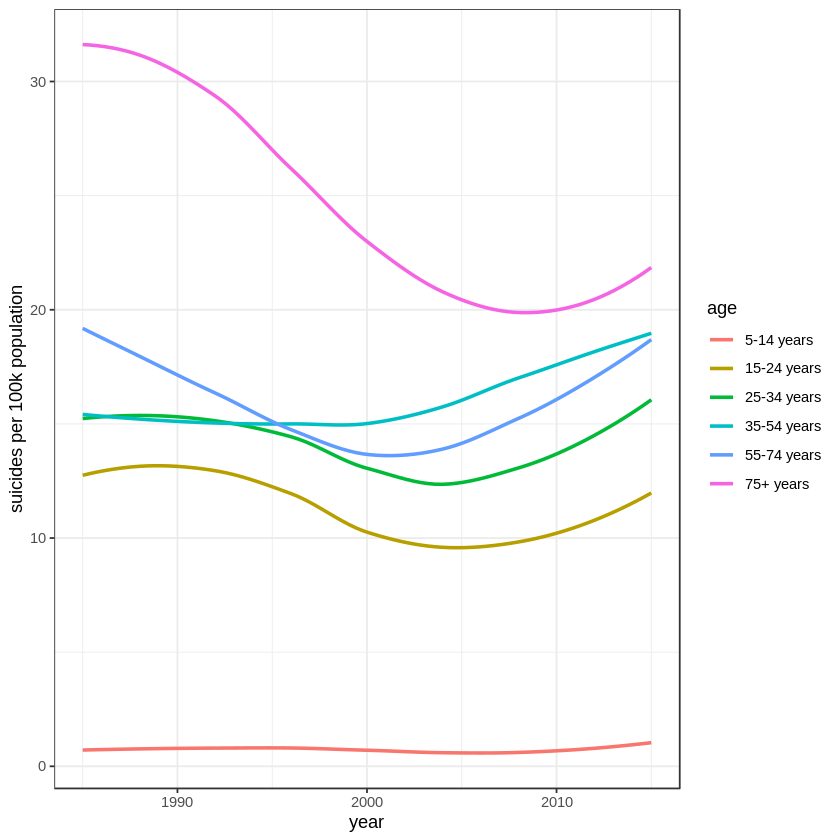

In [78]:
# graph of suicide rates over time comparing age
g3 <- ggplot(us_data, aes(x = year, y = suicide_by_100k, fill = age)) + geom_bar(stat = "identity") +
    facet_wrap(~age)
g3 <-  g3 + labs(y = "suicides per 100k population") + theme_bw()
g3

g4 <- ggplot(us_data, aes(x = year, y = suicide_by_100k, colour = age)) + geom_smooth(se= FALSE)
g4 <- g4 + labs(y = "suicides per 100k population") + theme_bw()
g4

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


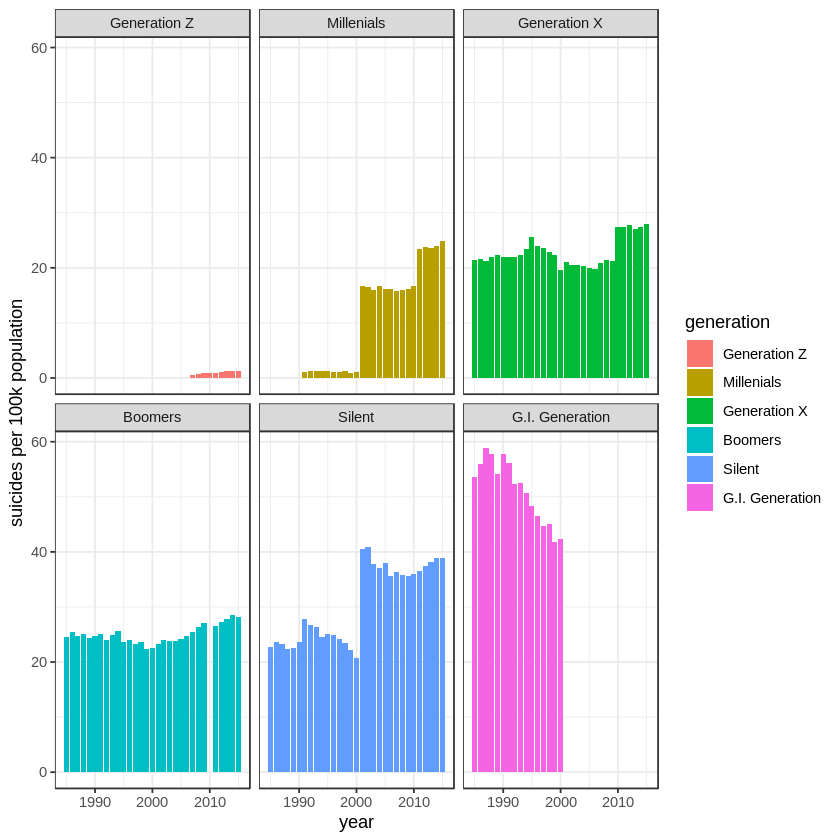

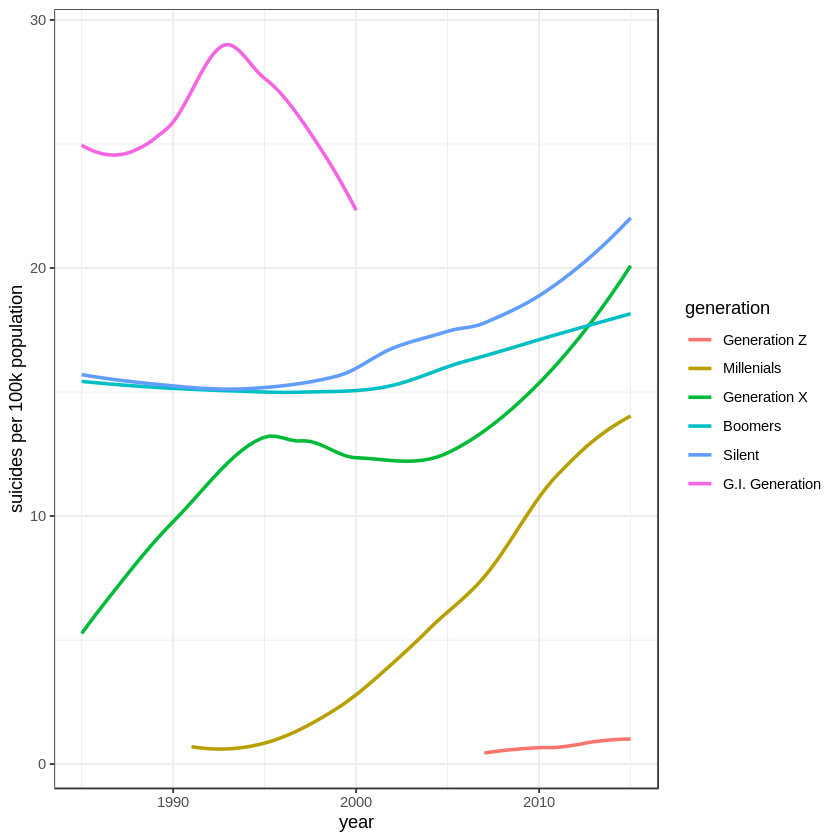

In [79]:
# graph of suicide rates over time comparing generation
g5 <- ggplot(us_data, aes(x = year, y = suicide_by_100k, fill = generation)) + geom_bar(stat = "identity") +
    facet_wrap(~generation)
g5 <- g5 + labs(y = "suicides per 100k population") + theme_bw()
g5

g6 <- ggplot(us_data, aes(x = year, y = suicide_by_100k, colour = generation)) + geom_smooth(se = FALSE)
g6 <- g6 + labs(y = "suicides per 100k population") + theme_bw()
g6

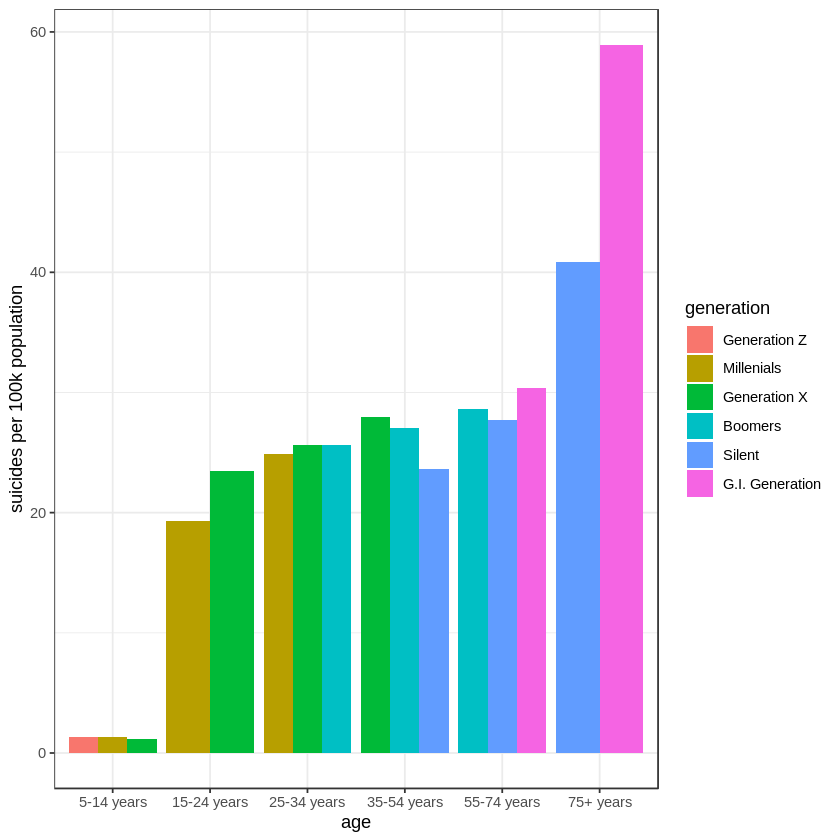

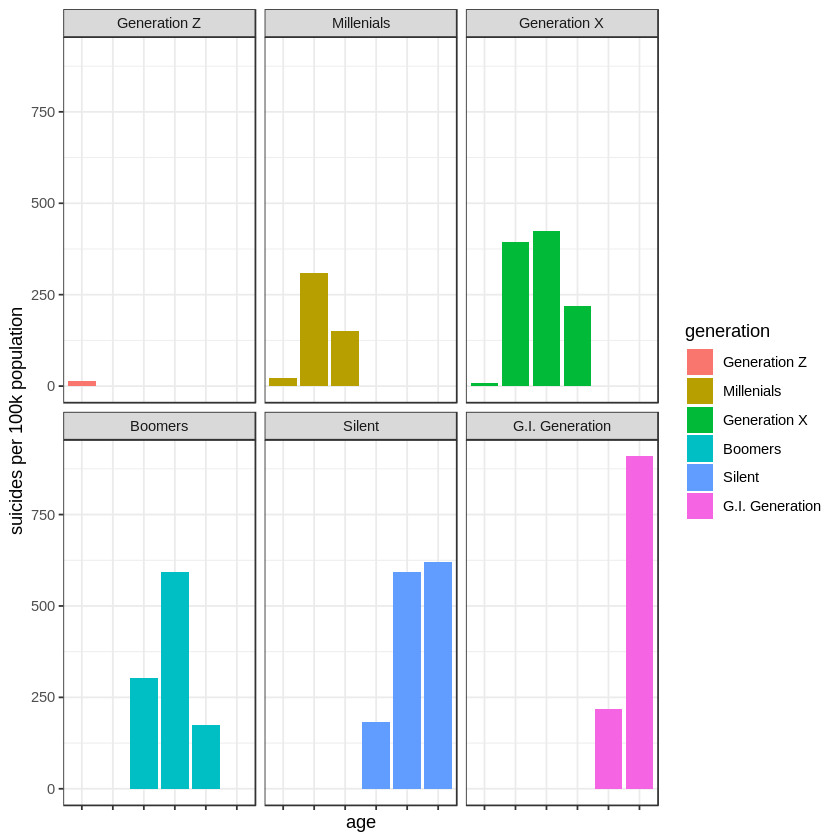

In [104]:
# lets look at how age interacts with generation
g7 <- ggplot(us_data, aes(x = age, y = suicide_by_100k, fill = generation)) + geom_bar(stat = "identity", position = position_dodge())
g7 <- g7 + labs(y = "suicides per 100k population") + theme_bw()
g7

g8 <- ggplot(us_data, aes(x = age, y = suicide_by_100k, fill = generation)) + geom_bar(stat = "identity") +
    facet_wrap(~generation)
g8 <- g8 + labs(y = "suicides per 100k population") + theme_bw() + theme(axis.text.x = element_blank())
g8

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


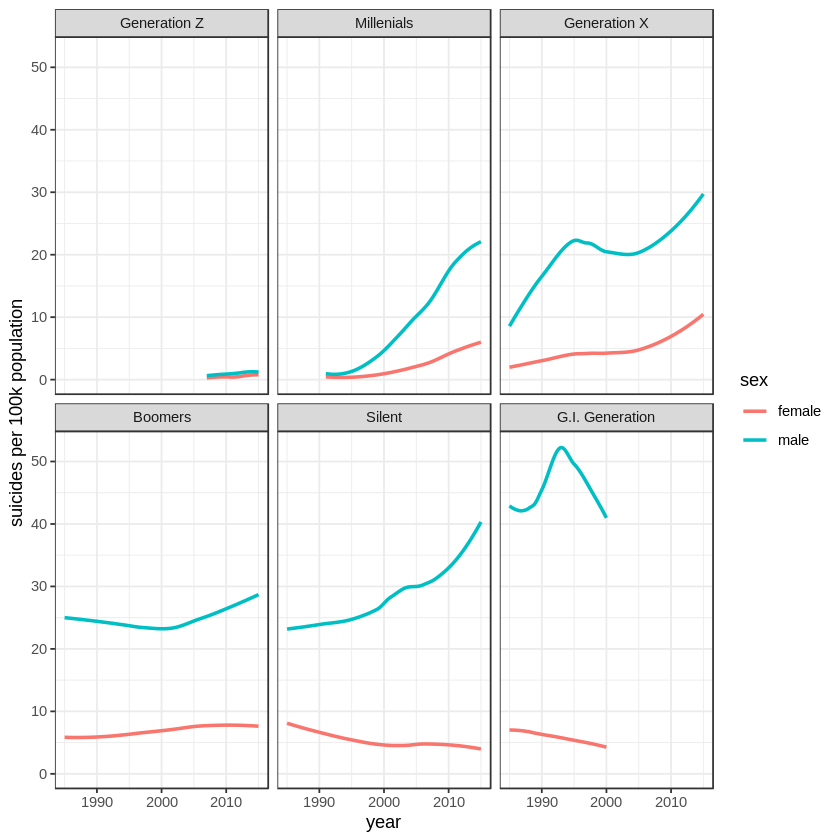

In [111]:
# how about generational differences when it comes to gender
g9 <- ggplot(us_data, aes(x = year, y = suicide_by_100k, color = sex)) + geom_smooth(se = FALSE) +
    facet_wrap(~generation)
g9 <- g9 + labs(y = "suicides per 100k population") + theme_bw()
g9

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


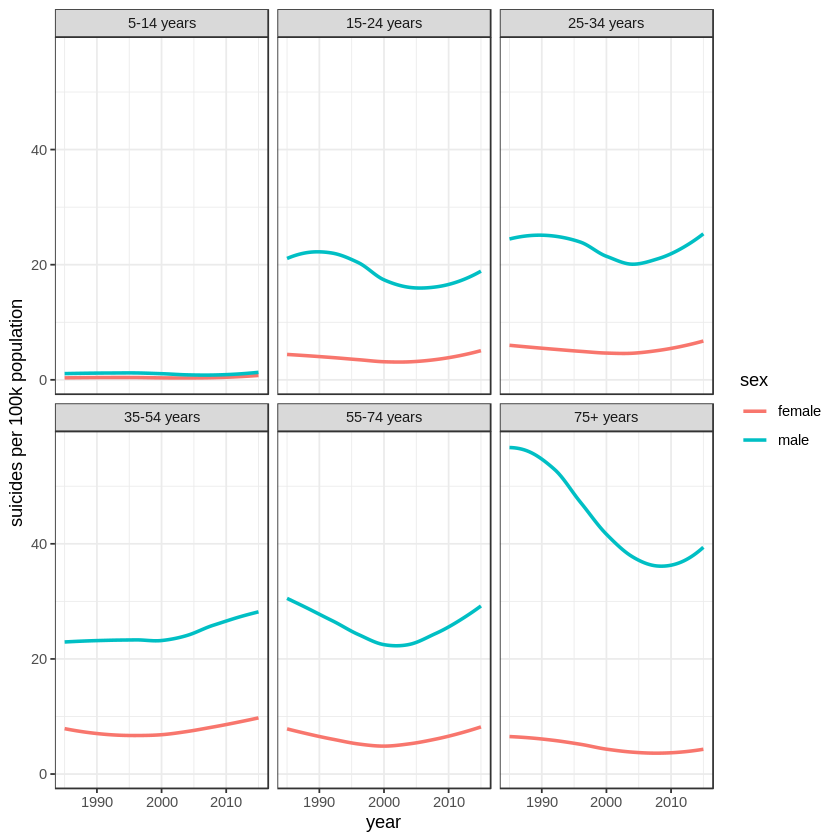

In [114]:
# and finally gender and age
g10 <- ggplot(us_data, aes(x = year, y = suicide_by_100k, color = sex)) + geom_smooth(se = FALSE) +
    facet_wrap(~age)
g10 <- g10 + labs(y = "suicides per 100k population") + theme_bw()
g10

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


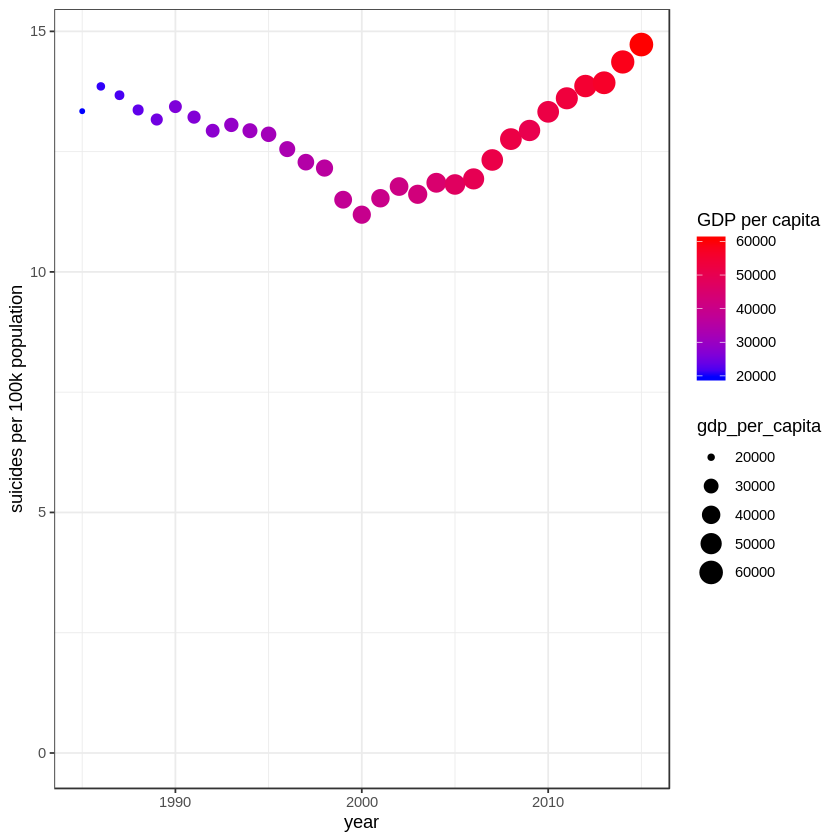

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


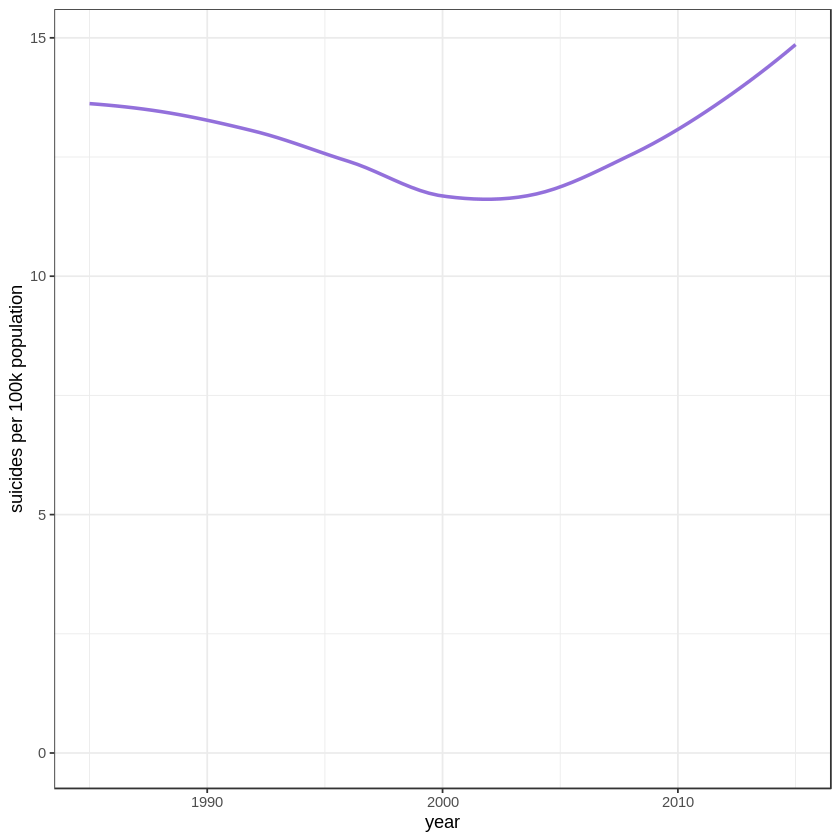

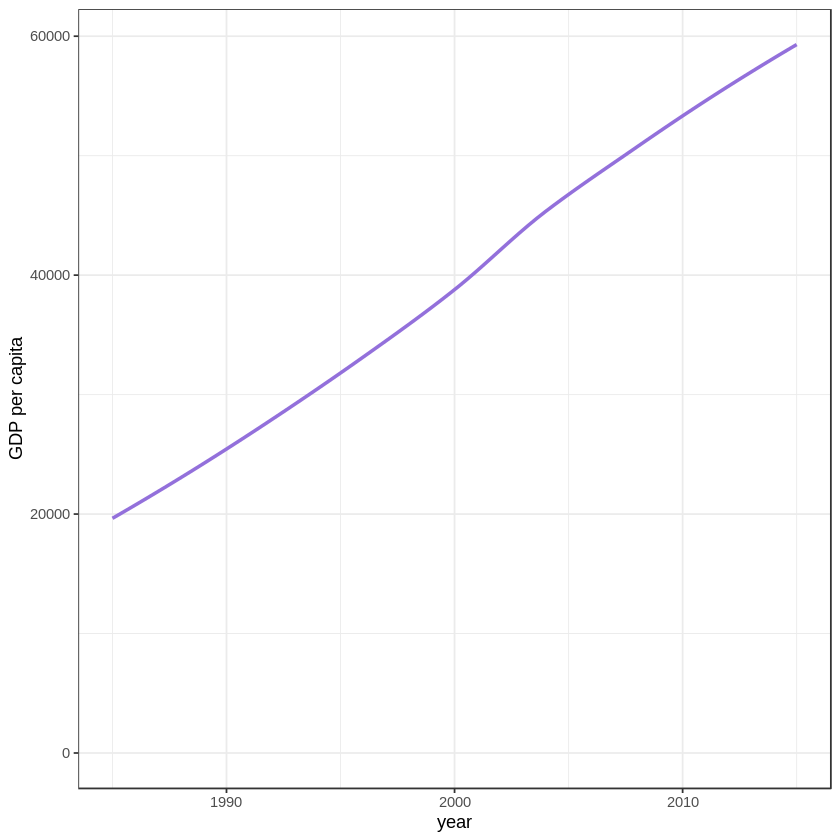

In [54]:
# the red herring
us_totals <- us_data %>% group_by(year) %>% # dataframe for totals (all genders, ages, generations)
    summarise(suicide_total = sum(suicide_total), population = sum(population)) %>%
    mutate(suicide_per_100k = suicide_total/(population/100000))

gdp_values <- us_data %>% distinct(year, gdp_per_capita) # get gdp_per_capita for each year

us_totals <- merge(us_totals, gdp_values, by = "year") # merge gdp_per_capita into us_totals

g11 <- ggplot(us_totals, aes(x = year, y = suicide_per_100k, colour = gdp_per_capita, size = gdp_per_capita)) + geom_point()
g11 <- g11 + labs(x = "year", y = "suicides per 100k population", colour = "GDP per capita") + 
    theme_bw() + 
    expand_limits(y = 0) +
    scale_colour_gradient(high = "red", low = "blue")
g11

g12 <- ggplot(us_totals, aes(x = year, y = suicide_per_100k)) + geom_smooth(se = FALSE, colour = "mediumpurple") + 
    theme_bw() +
    labs(x = "year", y = "suicides per 100k population") +
    expand_limits(y = 0)
g12

g13 <- ggplot(us_totals, aes(x = year, y = gdp_per_capita)) + geom_smooth(se = FALSE, colour = "mediumpurple") + 
    theme_bw() +
    labs(x = "year", y = "GDP per capita") +
    expand_limits(y = 0)
g13

## Conclusion: Tell the Story
In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel. 

Feel free to post more examples for people to look at and give feedback about. Your classmates will be vital providers of feedback in this process. Utilize them.

# Save your notebook, then `File > Close and Halt`